Etude de Marché

In [1]:
# Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
# Formatage 

#separateur milliers
pd.options.display.float_format = '{:,.2f}'.format

# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]


# Nettoyage des données

In [4]:
# Fichiers nom pays francais et anglais avec code iso3

Liste_Pays = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\Pays traduction.csv', delimiter=";")
Liste_Pays.head()

,Country,Pays,ISO 2,ISO 3,ISO ON
0,Afghanistan,Afghanistan,AF,AFG,4
1,Aland Islands,Îles Aland,AX,ALA,248
2,Albania,Albanie,AL,ALB,8
3,Algeria,Algérie,DZ,DZA,12
4,American Samoa,Samoa américaines,AS,ASM,16


In [5]:
# En registrement du CSV

Liste_Pays.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\Liste_Pays.csv')

## df Population

In [6]:
Population = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\DAN-P9-data\Population_2000_2018.csv', delimiter=";")
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779.95",X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606.99",X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600.77",X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680.87",X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726.68",X,Sources internationales sûres,NaN


In [7]:
# Suppression des colonnes inutiles
Population = Population.drop(columns=['Code Domaine', 'Domaine', 'Unité','Code Élément','Code Produit', 'Code année', 'Symbole', 'Description du Symbole', 'Note'])
Population = Population.rename(columns={"Valeur":"Population"})
Population["Population"] = Population["Population"]*1000
Population.head(2)

,Code zone,Zone,Élément,Produit,Année,Population
0,2,Afghanistan,Population totale,Population-Estimations,2000,"20,779,953.00"
1,2,Afghanistan,Population totale,Population-Estimations,2001,"21,606,988.00"


In [8]:
Population = Population.pivot_table(index=['Zone',"Code zone"], values='Population', columns=['Année']).reset_index()
Population 

Année,Zone,Code zone,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,2,"20,779,953.00","21,606,988.00","22,600,770.00","23,680,871.00","24,726,684.00","25,654,277.00","26,433,049.00","27,100,536.00",...,"28,394,813.00","29,185,507.00","30,117,413.00","31,161,376.00","32,269,589.00","33,370,794.00","34,413,603.00","35,383,032.00","36,296,113.00","37,171,921.00"
1,Afrique du Sud,202,"44,967,708.00","45,571,274.00","46,150,913.00","46,719,196.00","47,291,610.00","47,880,601.00","48,489,459.00","49,119,759.00",...,"50,477,011.00","51,216,964.00","52,003,755.00","52,832,658.00","53,687,121.00","54,544,186.00","55,386,367.00","56,207,646.00","57,009,756.00","57,792,518.00"
2,Albanie,3,"3,129,243.00","3,129,704.00","3,126,187.00","3,118,023.00","3,104,892.00","3,086,810.00","3,063,021.00","3,033,998.00",...,"2,973,048.00","2,948,023.00","2,928,592.00","2,914,096.00","2,903,790.00","2,896,305.00","2,890,513.00","2,886,438.00","2,884,169.00","2,882,740.00"
3,Algérie,4,"31,042,235.00","31,451,514.00","31,855,109.00","32,264,157.00","32,692,163.00","33,149,724.00","33,641,002.00","34,166,972.00",...,"35,333,881.00","35,977,455.00","36,661,445.00","37,383,895.00","38,140,133.00","38,923,692.00","39,728,025.00","40,551,392.00","41,389,189.00","42,228,408.00"
4,Allemagne,79,"81,400,882.00","81,453,885.00","81,535,122.00","81,614,380.00","81,646,474.00","81,602,741.00","81,472,226.00","81,277,830.00",...,"80,899,961.00","80,827,002.00","80,855,632.00","80,972,628.00","81,174,367.00","81,450,378.00","81,787,411.00","82,193,768.00","82,658,409.00","83,124,418.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,25,"412,660.00","423,944.00","435,432.00","447,017.00","458,539.00","469,918.00","481,078.00","492,132.00",...,"515,181.00","527,861.00","541,521.00","556,063.00","571,336.00","587,079.00","603,118.00","619,438.00","636,039.00","652,857.00"
234,Îles Turques-et-Caïques,224,"20,164.00","21,573.00","23,232.00","25,011.00","26,700.00","28,180.00","29,391.00","30,385.00",...,"31,934.00","32,660.00","33,377.00","34,066.00","34,731.00","35,369.00","35,981.00","36,559.00","37,115.00","37,665.00"
235,Îles Vierges américaines,240,"108,722.00","108,691.00","108,561.00","108,360.00","108,092.00","107,794.00","107,462.00","107,115.00",...,"106,412.00","106,087.00","105,793.00","105,534.00","105,303.00","105,114.00","104,958.00","104,835.00","104,751.00","104,680.00"
236,Îles Vierges britanniques,239,"20,311.00","20,675.00","21,129.00","21,672.00","22,334.00","23,107.00","24,023.00","25,047.00",...,"27,039.00","27,794.00","28,319.00","28,650.00","28,847.00","28,989.00","29,152.00","29,355.00","29,577.00","29,802.00"


In [9]:
Population.columns

Index([     'Zone', 'Code zone',        2000,        2001,        2002,
              2003,        2004,        2005,        2006,        2007,
              2008,        2009,        2010,        2011,        2012,
              2013,        2014,        2015,        2016,        2017,
              2018],
      dtype='object', name='Année')

In [10]:
Population["%_Evolutipon_population_2012/17"] = ((Population[2017]-Population[2012])/Population[2012])*100
Population = Population[["Code zone","Zone",2017,"%_Evolutipon_population_2012/17"]]
Population = Population.rename(columns={2017:"Population"})

Population

Année,Code zone,Zone,Population,%_Evolutipon_population_2012/17
0,2,Afghanistan,"36,296,113.00",16.48
1,202,Afrique du Sud,"57,009,756.00",7.91
2,3,Albanie,"2,884,169.00",-1.03
3,4,Algérie,"41,389,189.00",10.71
4,79,Allemagne,"82,658,409.00",2.08
...,...,...,...,...
233,25,Îles Salomon,"636,039.00",14.38
234,224,Îles Turques-et-Caïques,"37,115.00",8.95
235,240,Îles Vierges américaines,"104,751.00",-0.74
236,239,Îles Vierges britanniques,"29,577.00",3.24


In [11]:
Liste_Pays.sample(3)

,Country,Pays,ISO 2,ISO 3,ISO ON
143,Mexico,Mexique,MX,MEX,484
218,Taiwan Republic of China,Taiwan,TW,TWN,158
93,Guinea,Guinée,GN,GIN,324


In [12]:
PPP = Population.merge(Liste_Pays, left_on="Zone", right_on="Pays", how="left")

## df_PIB

In [13]:
PIB = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\DAN-P9-data\fao_data_pib.csv', delimiter=";")
PIB.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,160.83,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2000,2000,%,54.92,Fc,Donnée calculée,NaN
2,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2000,2000,%,50.38,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2001,2001,US$,166.54,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2001,2001,%,7.67,Fc,Donnée calculée,NaN


In [14]:
PIB = PIB[["Zone","Code zone (FAO)", "Année", "Élément", "Valeur", "Unité"]]
PIB = PIB.loc[PIB["Année"]==2017]

In [15]:
PIB = PIB.pivot_table(index=['Zone',"Code zone (FAO)"], values='Valeur', columns=['Élément']).reset_index()
PIB = PIB[['Zone', 'Code zone (FAO)','Croissance annuelle US$ par habitant', 'Valeur US $ par habitant']]
PIB = PIB.rename(columns={'Valeur US $ par habitant':"PIB $/habitant"})
PIB

Élément,Zone,Code zone (FAO),Croissance annuelle US$ par habitant,PIB $/habitant
0,Afghanistan,2,0.65,513.09
1,Afrique du Sud,202,16.11,"6,121.88"
2,Albanie,3,9.85,"4,514.20"
3,Algérie,4,4.14,"4,109.70"
4,Allemagne,79,5.61,"44,552.06"
...,...,...,...,...
206,Îles Cook,47,11.65,"19,741.19"
207,Îles Marshall,127,4.44,"3,578.32"
208,Îles Salomon,25,4.83,"1,911.43"
209,Îles Turques-et-Caïques,224,-2.46,"27,546.01"


## df_disponibilité alimentaire

In [16]:
DA = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\DAN-P9-data\DisponibiliteAlimentaire_2017.csv', delimiter=";")
DA.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,"4,281.00",S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,"2,302.00",S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,"6,701.00",S,Données standardisées


In [17]:
# Isolation des produits animaux
protein_list = [2721, 2732, 2733, 2734, 2735, 2761, 2763, 2764, 2767, 2768]
protein_tot = DA.loc[DA["Code Produit"].isin(protein_list),:]
protein_tot

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
633,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2732,Viande d'Ovins/Caprins,2017,2017,Milliers de tonnes,160.00,S,Données standardisées
634,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2732,Viande d'Ovins/Caprins,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
635,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2732,Viande d'Ovins/Caprins,2017,2017,Milliers de tonnes,160.00,S,Données standardisées
636,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2732,Viande d'Ovins/Caprins,2017,2017,Milliers de tonnes,9.00,S,Données standardisées
637,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2732,Viande d'Ovins/Caprins,2017,2017,Milliers de tonnes,151.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176560,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2767,"Mollusques, Autres",2017,2017,Milliers de tonnes,0.00,S,Données standardisées
176561,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2767,"Mollusques, Autres",2017,2017,kg,0.00,Fc,Donnée calculée
176562,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",2017,2017,Kcal/personne/jour,0.00,Fc,Donnée calculée
176563,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2767,"Mollusques, Autres",2017,2017,g/personne/jour,0.00,Fc,Donnée calculée


In [18]:
protein_tot["Produit"].unique()

array(["Viande d'Ovins/Caprins", 'Viande de Suides',
       'Viande de Volailles', 'Viande, Autre', 'Poissons Eau Douce',
       'Poissons Pelagiques', 'Poissons Marins, Autres',
       'Mollusques, Autres', 'Viande de Anim Aquatiq'], dtype=object)

In [19]:
# Données Elevage Viandes en générale
protein_tot = protein_tot.pivot_table(index=['Zone',"Code zone",'Produit'], values='Valeur', columns=['Élément']).reset_index()
protein_tot

Élément,Zone,Code zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,2,Poissons Eau Douce,NaN,NaN,0.00,0.00,0.25,0.02,0.07,9.00,NaN,0.00,9.00,NaN,9.00,NaN,NaN,NaN,NaN
1,Afghanistan,2,Viande d'Ovins/Caprins,NaN,NaN,NaN,26.00,4.15,2.16,1.62,160.00,NaN,0.00,151.00,9.00,160.00,NaN,NaN,NaN,NaN
2,Afghanistan,2,Viande de Suides,NaN,NaN,NaN,0.00,0.00,0.01,0.00,0.00,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00
3,Afghanistan,2,Viande de Volailles,NaN,NaN,NaN,5.00,1.53,0.33,0.54,57.00,NaN,29.00,55.00,2.00,28.00,0.00,NaN,NaN,0.00
4,Afghanistan,2,"Viande, Autre",NaN,NaN,NaN,1.00,0.30,0.05,0.14,12.00,NaN,0.00,11.00,1.00,12.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,Îles Salomon,25,Poissons Pelagiques,NaN,NaN,0.00,46.00,19.51,1.92,6.73,12.00,34.00,0.00,12.00,NaN,46.00,NaN,NaN,NaN,0.00
1378,Îles Salomon,25,Viande d'Ovins/Caprins,0.00,NaN,NaN,1.00,0.08,0.05,0.03,0.00,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00
1379,Îles Salomon,25,Viande de Suides,0.00,NaN,NaN,44.00,4.49,4.24,1.38,3.00,NaN,0.00,3.00,NaN,2.00,0.00,NaN,NaN,0.00
1380,Îles Salomon,25,Viande de Volailles,0.00,NaN,NaN,18.00,4.45,1.31,1.51,3.00,0.00,6.00,3.00,NaN,0.00,0.00,NaN,NaN,3.00


In [20]:
protein_tot.columns

Index(['Zone', 'Code zone', 'Produit', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [21]:
protein_tot = protein_tot.groupby("Zone").sum()
protein_tot = protein_tot.reset_index()
protein_tot = protein_tot[['Zone',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Disponibilité de protéines en quantité (g/personne/jour)',
        'Exportations - Quantité','Importations - Quantité', 'Nourriture','Production']]
protein_tot = protein_tot.add_suffix("_Global")
protein_tot = protein_tot.rename(columns={"Zone_Global":"Zone"})
protein_tot

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour)_Global,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global
0,Afghanistan,32.00,238.00,2.37,0.00,29.00,226.00,209.00
1,Afrique du Sud,213.00,"2,765.00",17.57,503.00,722.00,"2,650.00","2,544.00"
2,Albanie,205.00,104.00,13.10,8.00,61.00,104.00,55.00
3,Algérie,67.00,717.00,5.59,1.00,57.00,690.00,662.00
4,Allemagne,332.00,"6,801.00",25.50,"4,147.00","3,546.00","6,656.00","7,348.00"
...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,236.00,716.00,23.28,143.00,684.00,664.00,166.00
170,Équateur,137.00,652.00,11.13,618.00,67.00,620.00,"1,191.00"
171,États-Unis d'Amérique,374.00,"32,403.00",31.03,"7,267.00","3,634.00","31,773.00","36,162.00"
172,Éthiopie,9.00,252.00,0.93,1.00,4.00,248.00,250.00


In [22]:
# Isolation des produits "Volailles"
volailles = [2734]
DA = DA.loc[DA["Code Produit"].isin(volailles),:]
DA

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [23]:
Élément = ['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Pertes', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)','Exportations - Quantité']

DA = DA.loc[DA["Élément"].isin(Élément),:]

In [24]:
# Suppression des colonnes inutiles
DA = DA.drop(columns=['Code Domaine', 'Domaine', 'Code Élément',
                      'Code Produit', 'Code année','Symbole', 'Description du Symbole'])
DA.head()

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
651,2,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.00
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.00
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.00
655,2,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.00
657,2,Afghanistan,Nourriture,Viande de Volailles,2017,Milliers de tonnes,55.00


In [25]:
DA["Unité"].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [26]:
# Données Elevage 
DA = DA.pivot_table(index=['Zone',"Code zone"], values='Valeur', columns=['Produit','Élément']).reset_index()
DA

Produit                   Zone Code zone  \
Élément                                    
0                  Afghanistan         2   
1               Afrique du Sud       202   
2                      Albanie         3   
3                      Algérie         4   
4                    Allemagne        79   
..                         ...       ...   
167        Émirats arabes unis       225   
168                   Équateur        58   
169      États-Unis d'Amérique       231   
170                   Éthiopie       238   
171               Îles Salomon        25   

Produit                            Viande de Volailles  \
Élément Disponibilité alimentaire (Kcal/personne/jour)   
0                                                 5.00   
1                                               143.00   
2                                                85.00   
3                                                22.00   
4                                                71.00   
..                                                 ...   
167                                             147.00   
168                                              83.00   
169                                             219.00   
170                                               0.00   
171                                              18.00   

Produit                                                         \
Élément Disponibilité alimentaire en quantité (kg/personne/an)   
0                                                     1.53       
1                                                    35.69       
2                                                    16.36       
3                                                     6.38       
4                                                    19.47       
..                                                     ...       
167                                                  43.47       
168                                                  19.31       
169                                                  55.68       
170                                                   0.13       
171                                                   4.45       

Produit                                                           \
Élément Disponibilité de protéines en quantité (g/personne/jour)   
0                                                     0.54         
1                                                    14.11         
2                                                     6.26         
3                                                     1.97         
4                                                     7.96         
..                                                     ...         
167                                                  14.80         
168                                                   6.15         
169                                                  19.93         
170                                                   0.04         
171                                                   1.51         

Produit                                                   \
Élément Disponibilité intérieure Exportations - Quantité   
0                          57.00                     NaN   
1                       2,118.00                   63.00   
2                          47.00                    0.00   
3                         277.00                    0.00   
4                       1,739.00                  646.00   
..                           ...                     ...   
167                       412.00                   94.00   
168                       341.00                    0.00   
169                    18,266.00                3,692.00   
170                        14.00                     NaN   
171                         3.00                    0.00   

Produit                                                       
Élément Importations - Quantité Nourriture Pertes Production  
0                    

In [27]:
DA.shape

(172, 11)

In [28]:
DA.isna().sum()

Produit              Élément                                                 
Zone                                                                               0
Code zone                                                                          0
Viande de Volailles  Disponibilité alimentaire (Kcal/personne/jour)                0
                     Disponibilité alimentaire en quantité (kg/personne/an)        0
                     Disponibilité de protéines en quantité (g/personne/jour)      0
                     Disponibilité intérieure                                      2
                     Exportations - Quantité                                      37
                     Importations - Quantité                                       2
                     Nourriture                                                    2
                     Pertes                                                      105
                     Production                                         

## Jointures

In [29]:
data = DA.merge(Liste_Pays, left_on="Zone", right_on="Pays", how="left")
data.isna().sum()

C:\Users\melle\AppData\Local\Temp\ipykernel_2596\2364043015.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data = DA.merge(Liste_Pays, left_on="Zone", right_on="Pays", how="left")


(Zone, )                                                                             0
(Code zone, )                                                                        0
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))                0
(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))        0
(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))      0
(Viande de Volailles, Disponibilité intérieure)                                      2
(Viande de Volailles, Exportations - Quantité)                                      37
(Viande de Volailles, Importations - Quantité)                                       2
(Viande de Volailles, Nourriture)                                                    2
(Viande de Volailles, Pertes)                                                      105
(Viande de Volailles, Production)                                                    4
Country                                    

In [30]:
data.sample(3)

,"(Zone, )","(Code zone, )","(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))","(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))","(Viande de Volailles, Disponibilité intérieure)","(Viande de Volailles, Exportations - Quantité)","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Pertes)","(Viande de Volailles, Production)",Country,Pays,ISO 2,ISO 3,ISO ON
14,Bangladesh,16,7.00,1.50,0.47,250.00,NaN,0.00,240.00,10.00,249.00,Bangladesh,Bangladesh,BD,BGD,50
158,Ukraine,230,78.00,22.62,7.58,"1,009.00",273.00,121.00,"1,006.00",NaN,"1,211.00",Ukraine,Ukraine,UA,UKR,804
121,Portugal,174,109.00,30.58,12.74,325.00,44.00,82.00,315.00,NaN,361.00,Portugal,Portugal,PT,PRT,620


In [31]:
data.columns

Index([                                                                       ('Zone', ''),
                                                                         ('Code zone', ''),
                 ('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)'),
         ('Viande de Volailles', 'Disponibilité alimentaire en quantité (kg/personne/an)'),
       ('Viande de Volailles', 'Disponibilité de protéines en quantité (g/personne/jour)'),
                                       ('Viande de Volailles', 'Disponibilité intérieure'),
                                        ('Viande de Volailles', 'Exportations - Quantité'),
                                        ('Viande de Volailles', 'Importations - Quantité'),
                                                     ('Viande de Volailles', 'Nourriture'),
                                                         ('Viande de Volailles', 'Pertes'),
                                                     ('Viande de Volailles', 'Pr

In [32]:
data.columns

Index([                                                                       ('Zone', ''),
                                                                         ('Code zone', ''),
                 ('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)'),
         ('Viande de Volailles', 'Disponibilité alimentaire en quantité (kg/personne/an)'),
       ('Viande de Volailles', 'Disponibilité de protéines en quantité (g/personne/jour)'),
                                       ('Viande de Volailles', 'Disponibilité intérieure'),
                                        ('Viande de Volailles', 'Exportations - Quantité'),
                                        ('Viande de Volailles', 'Importations - Quantité'),
                                                     ('Viande de Volailles', 'Nourriture'),
                                                         ('Viande de Volailles', 'Pertes'),
                                                     ('Viande de Volailles', 'Pr

In [33]:
data = data.rename(columns={('Code zone', ''):"Code zone"})
data = data.rename(columns={('Zone', ''):"Zone"})
data.sample(3)

,Zone,Code zone,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))","(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))","(Viande de Volailles, Disponibilité intérieure)","(Viande de Volailles, Exportations - Quantité)","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Pertes)","(Viande de Volailles, Production)",Country,Pays,ISO 2,ISO 3,ISO ON
122,Pérou,170,62.00,13.47,6.71,"1,523.00",1.00,60.00,424.00,316.00,"1,465.00",Peru,Pérou,PE,PER,604
36,Colombie,44,111.00,31.99,9.57,"1,643.00",2.00,78.00,"1,565.00",78.00,"1,564.00",Colombia,Colombie,CO,COL,170
1,Afrique du Sud,202,143.00,35.69,14.11,"2,118.00",63.00,514.00,"2,035.00",83.00,"1,667.00",South Africa,Afrique du Sud,ZA,ZAF,710


In [34]:
Population.sample(3)

Année,Code zone,Zone,Population,%_Evolutipon_population_2012/17
170,188,Saint-Kitts-et-Nevis,"52,045.00",4.33
108,154,Macédoine du Nord,"2,081,996.00",0.37
14,10,Australie,"24,584,620.00",7.34


In [35]:
data1 = data.merge(Population,on=['Zone','Code zone'], how='left')
data1

,Zone,Code zone,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))","(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))","(Viande de Volailles, Disponibilité intérieure)","(Viande de Volailles, Exportations - Quantité)","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Pertes)","(Viande de Volailles, Production)",Country,Pays,ISO 2,ISO 3,ISO ON,Population,%_Evolutipon_population_2012/17
0,Afghanistan,2,5.00,1.53,0.54,57.00,NaN,29.00,55.00,2.00,28.00,Afghanistan,Afghanistan,AF,AFG,4,"36,296,113.00",16.48
1,Afrique du Sud,202,143.00,35.69,14.11,"2,118.00",63.00,514.00,"2,035.00",83.00,"1,667.00",South Africa,Afrique du Sud,ZA,ZAF,710,"57,009,756.00",7.91
2,Albanie,3,85.00,16.36,6.26,47.00,0.00,38.00,47.00,NaN,13.00,Albania,Albanie,AL,ALB,8,"2,884,169.00",-1.03
3,Algérie,4,22.00,6.38,1.97,277.00,0.00,2.00,264.00,13.00,275.00,Algeria,Algérie,DZ,DZA,12,"41,389,189.00",10.71
4,Allemagne,79,71.00,19.47,7.96,"1,739.00",646.00,842.00,"1,609.00",NaN,"1,514.00",Germany,Allemagne,DE,DEU,276,"82,658,409.00",2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,147.00,43.47,14.80,412.00,94.00,433.00,412.00,NaN,48.00,United Arab Emirates,Émirats arabes unis,AE,ARE,784,"9,487,203.00",3.78
168,Équateur,58,83.00,19.31,6.15,341.00,0.00,0.00,324.00,17.00,340.00,NaN,NaN,NaN,NaN,NaN,"16,785,361.00",8.47
169,États-Unis d'Amérique,231,219.00,55.68,19.93,"18,266.00","3,692.00",123.00,"18,100.00",NaN,"21,914.00",NaN,NaN,NaN,NaN,NaN,"325,084,756.00",3.52
170,Éthiopie,238,0.00,0.13,0.04,14.00,NaN,1.00,14.00,1.00,14.00,Ethiopia,Éthiopie,ET,ETH,231,"106,399,924.00",14.75


In [36]:
PIB = PIB.rename(columns={('Code zone (FAO)'):"Code zone"})
PIB.sample(3)

Élément,Zone,Code zone,Croissance annuelle US$ par habitant,PIB $/habitant
154,République démocratique du Congo,250,-9.67,462.45
201,Équateur,58,2.53,"6,213.50"
20,Belgique,255,5.06,"44,020.07"


In [37]:
data3 = data1.merge(PIB,on=['Zone','Code zone'],how='left')
data3

,Zone,Code zone,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))","(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))","(Viande de Volailles, Disponibilité intérieure)","(Viande de Volailles, Exportations - Quantité)","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Pertes)","(Viande de Volailles, Production)",Country,Pays,ISO 2,ISO 3,ISO ON,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant
0,Afghanistan,2,5.00,1.53,0.54,57.00,NaN,29.00,55.00,2.00,28.00,Afghanistan,Afghanistan,AF,AFG,4,"36,296,113.00",16.48,0.65,513.09
1,Afrique du Sud,202,143.00,35.69,14.11,"2,118.00",63.00,514.00,"2,035.00",83.00,"1,667.00",South Africa,Afrique du Sud,ZA,ZAF,710,"57,009,756.00",7.91,16.11,"6,121.88"
2,Albanie,3,85.00,16.36,6.26,47.00,0.00,38.00,47.00,NaN,13.00,Albania,Albanie,AL,ALB,8,"2,884,169.00",-1.03,9.85,"4,514.20"
3,Algérie,4,22.00,6.38,1.97,277.00,0.00,2.00,264.00,13.00,275.00,Algeria,Algérie,DZ,DZA,12,"41,389,189.00",10.71,4.14,"4,109.70"
4,Allemagne,79,71.00,19.47,7.96,"1,739.00",646.00,842.00,"1,609.00",NaN,"1,514.00",Germany,Allemagne,DE,DEU,276,"82,658,409.00",2.08,5.61,"44,552.06"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,147.00,43.47,14.80,412.00,94.00,433.00,412.00,NaN,48.00,United Arab Emirates,Émirats arabes unis,AE,ARE,784,"9,487,203.00",3.78,6.56,"40,644.80"
168,Équateur,58,83.00,19.31,6.15,341.00,0.00,0.00,324.00,17.00,340.00,NaN,NaN,NaN,NaN,NaN,"16,785,361.00",8.47,2.53,"6,213.50"
169,États-Unis d'Amérique,231,219.00,55.68,19.93,"18,266.00","3,692.00",123.00,"18,100.00",NaN,"21,914.00",NaN,NaN,NaN,NaN,NaN,"325,084,756.00",3.52,3.59,"60,116.57"
170,Éthiopie,238,0.00,0.13,0.04,14.00,NaN,1.00,14.00,1.00,14.00,Ethiopia,Éthiopie,ET,ETH,231,"106,399,924.00",14.75,3.63,721.75


In [38]:
data3.isna().sum()

Zone                                                                                 0
Code zone                                                                            0
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))                0
(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))        0
(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))      0
(Viande de Volailles, Disponibilité intérieure)                                      2
(Viande de Volailles, Exportations - Quantité)                                      37
(Viande de Volailles, Importations - Quantité)                                       2
(Viande de Volailles, Nourriture)                                                    2
(Viande de Volailles, Pertes)                                                      105
(Viande de Volailles, Production)                                                    4
Country                                    

In [39]:
# Choix des variables 
dfa = data3[["Code zone","Zone",'Population','%_Evolutipon_population_2012/17','Croissance annuelle US$ par habitant',
                  'PIB $/habitant', ('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)'),
                                        ('Viande de Volailles', 'Importations - Quantité'),
                                                     ('Viande de Volailles', 'Nourriture'),
                                                     ('Viande de Volailles', 'Production')]]
dfa

C:\Users\melle\anaconda3\envs\P9\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,Code zone,Zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Production)"
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00"
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00"
...,...,...,...,...,...,...,...,...,...,...
167,225,Émirats arabes unis,"9,487,203.00",3.78,6.56,"40,644.80",147.00,433.00,412.00,48.00
168,58,Équateur,"16,785,361.00",8.47,2.53,"6,213.50",83.00,0.00,324.00,340.00
169,231,États-Unis d'Amérique,"325,084,756.00",3.52,3.59,"60,116.57",219.00,123.00,"18,100.00","21,914.00"
170,238,Éthiopie,"106,399,924.00",14.75,3.63,721.75,0.00,1.00,14.00,14.00


In [40]:
dfa = dfa.rename(columns={('Viande de Volailles', 'Importations - Quantité'):'Importations de Volailles en tonne', 
                         ('Viande de Volailles', 'Nourriture'):'Nourriture en tonne',
                         ('Viande de Volailles', 'Production'): 'Production en tonnes',
                        })
dfa

,Code zone,Zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))",Importations de Volailles en tonne,Nourriture en tonne,Production en tonnes
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00"
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00"
...,...,...,...,...,...,...,...,...,...,...
167,225,Émirats arabes unis,"9,487,203.00",3.78,6.56,"40,644.80",147.00,433.00,412.00,48.00
168,58,Équateur,"16,785,361.00",8.47,2.53,"6,213.50",83.00,0.00,324.00,340.00
169,231,États-Unis d'Amérique,"325,084,756.00",3.52,3.59,"60,116.57",219.00,123.00,"18,100.00","21,914.00"
170,238,Éthiopie,"106,399,924.00",14.75,3.63,721.75,0.00,1.00,14.00,14.00


In [41]:
df = dfa.merge(protein_tot,on='Zone',how='left')
df.head()

,Code zone,Zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))",Importations de Volailles en tonne,Nourriture en tonne,Production en tonnes,Disponibilité alimentaire (Kcal/personne/jour)_Global,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00,32.00,238.00,2.37,0.00,29.00,226.00,209.00
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00",213.00,"2,765.00",17.57,503.00,722.00,"2,650.00","2,544.00"
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00,205.00,104.00,13.10,8.00,61.00,104.00,55.00
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00,67.00,717.00,5.59,1.00,57.00,690.00,662.00
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00",332.00,"6,801.00",25.50,"4,147.00","3,546.00","6,656.00","7,348.00"


In [42]:
df.shape

(172, 17)

In [43]:
df.isna().sum()

Code zone                                                                0
Zone                                                                     0
Population                                                               0
%_Evolutipon_population_2012/17                                          0
Croissance annuelle US$ par habitant                                     1
PIB $/habitant                                                           1
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))    0
Importations de Volailles en tonne                                       2
Nourriture en tonne                                                      2
Production en tonnes                                                     4
Disponibilité alimentaire (Kcal/personne/jour)_Global                    0
Disponibilité intérieure_Global                                          0
Disponibilité de protéines en quantité (g/personne/jour)_Global          0
Exportations - Quantité_G

## Calcul des ratios

In [44]:
# Volailles
a = df[('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)')]
b = df['Importations de Volailles en tonne']
c = df['Nourriture en tonne']
d = df['Production en tonnes']
# Proteines en Générales
e = df['Disponibilité alimentaire (Kcal/personne/jour)_Global']
f = df['Importations - Quantité_Global']
g = df['Nourriture_Global']
h = df['Production_Global']


df["%Volailles Dispo alimentaire Kcal/pers/j"] = (a/e)*100
df["%Volailles Importation en tonne"] = (b/f)*100
df["%Volailles Nourriture en tonne"] = (c/g)*100
df["%Volailles Production en tonne"] = (d/h)*100
df.head()

,Code zone,Zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))",Importations de Volailles en tonne,Nourriture en tonne,Production en tonnes,...,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00,...,238.00,2.37,0.00,29.00,226.00,209.00,15.62,100.00,24.34,13.40
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00",...,"2,765.00",17.57,503.00,722.00,"2,650.00","2,544.00",67.14,71.19,76.79,65.53
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00,...,104.00,13.10,8.00,61.00,104.00,55.00,41.46,62.30,45.19,23.64
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00,...,717.00,5.59,1.00,57.00,690.00,662.00,32.84,3.51,38.26,41.54
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00",...,"6,801.00",25.50,"4,147.00","3,546.00","6,656.00","7,348.00",21.39,23.75,24.17,20.60


In [45]:
# Taux d'ouverture = Part d'échange internationaux dans une économie

df["TO"] = (((df['Exportations - Quantité_Global']+df['Importations - Quantité_Global'])/2)/df['PIB $/habitant'])*100

In [46]:
df.columns

Index([                                                              'Code zone',
                                                                          'Zone',
                                                                    'Population',
                                               '%_Evolutipon_population_2012/17',
                                          'Croissance annuelle US$ par habitant',
                                                                'PIB $/habitant',
       ('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)'),
                                            'Importations de Volailles en tonne',
                                                           'Nourriture en tonne',
                                                          'Production en tonnes',
                         'Disponibilité alimentaire (Kcal/personne/jour)_Global',
                                               'Disponibilité intérieure_Global',
               '

In [47]:
df

,Code zone,Zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))",Importations de Volailles en tonne,Nourriture en tonne,Production en tonnes,...,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne,TO
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00,...,2.37,0.00,29.00,226.00,209.00,15.62,100.00,24.34,13.40,2.83
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00",...,17.57,503.00,722.00,"2,650.00","2,544.00",67.14,71.19,76.79,65.53,10.01
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00,...,13.10,8.00,61.00,104.00,55.00,41.46,62.30,45.19,23.64,0.76
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00,...,5.59,1.00,57.00,690.00,662.00,32.84,3.51,38.26,41.54,0.71
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00",...,25.50,"4,147.00","3,546.00","6,656.00","7,348.00",21.39,23.75,24.17,20.60,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,225,Émirats arabes unis,"9,487,203.00",3.78,6.56,"40,644.80",147.00,433.00,412.00,48.00,...,23.28,143.00,684.00,664.00,166.00,62.29,63.30,62.05,28.92,1.02
168,58,Équateur,"16,785,361.00",8.47,2.53,"6,213.50",83.00,0.00,324.00,340.00,...,11.13,618.00,67.00,620.00,"1,191.00",60.58,0.00,52.26,28.55,5.51
169,231,États-Unis d'Amérique,"325,084,756.00",3.52,3.59,"60,116.57",219.00,123.00,"18,100.00","21,914.00",...,31.03,"7,267.00","3,634.00","31,773.00","36,162.00",58.56,3.38,56.97,60.60,9.07
170,238,Éthiopie,"106,399,924.00",14.75,3.63,721.75,0.00,1.00,14.00,14.00,...,0.93,1.00,4.00,248.00,250.00,0.00,25.00,5.65,5.60,0.35


## Logistique

In [48]:
Logistique = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\DAN-P9-data\Indice de performance logistique.csv', delimiter=";")
Logistique = Logistique[['Country Name',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020']]
Logistique.head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.39,NaN,NaN,2.38,NaN,2.46,NaN,2.47,NaN,2.58,NaN,2.49,NaN,NaN
2,Afghanistan,1.21,NaN,NaN,2.24,NaN,2.30,NaN,2.07,NaN,2.14,NaN,1.95,NaN,NaN
3,NaN,2.30,NaN,NaN,2.46,NaN,2.45,NaN,2.45,NaN,2.35,NaN,2.41,NaN,NaN
4,Angola,2.48,NaN,NaN,2.25,NaN,2.28,NaN,2.54,NaN,2.24,NaN,2.05,NaN,NaN


In [49]:
Logistique.shape

(266, 15)

In [50]:
Logistique.isna().sum()

Country Name      2
2007             76
2008            259
2009            266
2010             73
2011            257
2012             74
2013            257
2014             67
2015            258
2016             67
2017            258
2018             68
2019            257
2020            266
dtype: int64

In [51]:
# Harmonisation du nom des pays des 2 df

Logistique = Logistique.replace('États-Unis', "États-Unis d\'Amérique")
Logistique = Logistique.replace('Corée', 'République de Corée')
Logistique = Logistique.replace('Chine', 'Chine, continentale')
Logistique = Logistique.replace('Bolivie', 'Bolivie (État plurinational de)')
Logistique = Logistique.replace('Royaume-Uni', "Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord")
Logistique = Logistique.replace('Moldova', 'République de Moldova')
Logistique = Logistique.replace('Macedonia', 'North Macedonia')
Logistique = Logistique.replace('Tanzanie', 'République-Unie de Tanzanie')
Logistique = Logistique.replace('Venezuela', 'Venezuela (République bolivarienne du)')
Logistique = Logistique.replace('Iran', 'Iran (République islamique d\')')
Logistique = Logistique.replace('Iran', 'Iran (République islamique d\')')

In [52]:
Logistique = pd.melt(Logistique, id_vars="Country Name")

In [53]:
Logistique = Logistique.groupby("Country Name").mean()
Logistique = Logistique.rename(columns={"value":"Indice de performance logistique"})
Logistique = Logistique.reset_index()

In [54]:
Logistique = Logistique.rename(columns={"Country Name":"Pays"})
Logistique

,Pays,Indice de performance logistique
0,Afghanistan,1.99
1,Afrique du Nord et Moyen-Orient,2.80
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),2.51
3,Afrique du Nord et Moyen-Orient (hors revenu é...,2.51
4,Afrique du Sud,3.54
...,...,...
254,Îles Marshall,NaN
255,Îles Salomon,2.40
256,Îles Turques-et-Caïques,NaN
257,Îles Vierges (EU),NaN


In [55]:
# Pays sans données sur la qualité de la logistique

Logistique[Logistique['Indice de performance logistique'].isnull()]

,Pays,Indice de performance logistique
15,Andorre,NaN
17,Antigua-et-Barbuda,NaN
21,Aruba,NaN
36,Barbade,NaN
38,Belize,NaN
39,Bermudes,NaN
51,Cabo Verde,NaN
58,Cisjordanie et Gaza,NaN
65,Curacao,NaN
69,Dominique,NaN


In [56]:
Logistique.isna().sum()

Pays                                 0
Indice de performance logistique    50
dtype: int64

In [57]:
# Logistique.Zone.unique()

In [58]:
Liste_Pays.columns

Index(['Country', 'Pays', 'ISO 2', 'ISO 3', 'ISO ON'], dtype='object')

In [59]:
Liste_Pays.head(2)

,Country,Pays,ISO 2,ISO 3,ISO ON
0,Afghanistan,Afghanistan,AF,AFG,4
1,Aland Islands,Îles Aland,AX,ALA,248


In [60]:
Logistique.head(2)

,Pays,Indice de performance logistique
0,Afghanistan,1.99
1,Afrique du Nord et Moyen-Orient,2.80


In [61]:
Logistique = Liste_Pays.merge(Logistique,on='Pays',how='right')

In [62]:
Logistique

,Country,Pays,ISO 2,ISO 3,ISO ON,Indice de performance logistique
0,Afghanistan,Afghanistan,AF,AFG,4,1.99
1,NaN,Afrique du Nord et Moyen-Orient,NaN,NaN,NaN,2.80
2,NaN,Afrique du Nord et Moyen-Orient (BIRD et IDA),NaN,NaN,NaN,2.51
3,NaN,Afrique du Nord et Moyen-Orient (hors revenu é...,NaN,NaN,NaN,2.51
4,South Africa,Afrique du Sud,ZA,ZAF,710,3.54
...,...,...,...,...,...,...
254,NaN,Îles Marshall,NaN,NaN,NaN,NaN
255,Solomon Islands,Îles Salomon,SB,SLB,90,2.40
256,NaN,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN
257,NaN,Îles Vierges (EU),NaN,NaN,NaN,NaN


In [63]:
Logistique.isna().sum()

Country                             87
Pays                                 0
ISO 2                               88
ISO 3                               87
ISO ON                              87
Indice de performance logistique    50
dtype: int64

In [64]:
# Valeur nulle dataX

Logistique[Logistique['Indice de performance logistique'].isnull()]

,Country,Pays,ISO 2,ISO 3,ISO ON,Indice de performance logistique
15,Andorra,Andorre,AD,AND,20,NaN
17,Antigua and Barbuda,Antigua-et-Barbuda,AG,ATG,28,NaN
21,Aruba,Aruba,AW,ABW,533,NaN
36,Barbados,Barbade,BB,BRB,52,NaN
38,Belize,Belize,BZ,BLZ,84,NaN
39,Bermuda,Bermudes,BM,BMU,60,NaN
51,NaN,Cabo Verde,NaN,NaN,NaN,NaN
58,NaN,Cisjordanie et Gaza,NaN,NaN,NaN,NaN
65,NaN,Curacao,NaN,NaN,NaN,NaN
69,Dominica,Dominique,DM,DMA,212,NaN


In [65]:
Logistique.shape

(259, 6)

In [66]:
Logistique.isna().sum()

Country                             87
Pays                                 0
ISO 2                               88
ISO 3                               87
ISO ON                              87
Indice de performance logistique    50
dtype: int64

In [67]:
df = df.rename(columns={"Zone":"Pays"})

In [68]:
Logistique.isna().sum()

Country                             87
Pays                                 0
ISO 2                               88
ISO 3                               87
ISO ON                              87
Indice de performance logistique    50
dtype: int64

In [69]:
Liste_Pays

,Country,Pays,ISO 2,ISO 3,ISO ON
0,Afghanistan,Afghanistan,AF,AFG,4
1,Aland Islands,Îles Aland,AX,ALA,248
2,Albania,Albanie,AL,ALB,8
3,Algeria,Algérie,DZ,DZA,12
4,American Samoa,Samoa américaines,AS,ASM,16
...,...,...,...,...,...
244,Wallis and Futuna Islands,Wallis-et-Futuna,WF,WLF,876
245,Western Sahara,Sahara occidental,EH,ESH,732
246,Yemen,Yémen,YE,YEM,887
247,Zambia,Zambie,ZM,ZMB,894


In [70]:
df

,Code zone,Pays,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))",Importations de Volailles en tonne,Nourriture en tonne,Production en tonnes,...,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne,TO
0,2,Afghanistan,"36,296,113.00",16.48,0.65,513.09,5.00,29.00,55.00,28.00,...,2.37,0.00,29.00,226.00,209.00,15.62,100.00,24.34,13.40,2.83
1,202,Afrique du Sud,"57,009,756.00",7.91,16.11,"6,121.88",143.00,514.00,"2,035.00","1,667.00",...,17.57,503.00,722.00,"2,650.00","2,544.00",67.14,71.19,76.79,65.53,10.01
2,3,Albanie,"2,884,169.00",-1.03,9.85,"4,514.20",85.00,38.00,47.00,13.00,...,13.10,8.00,61.00,104.00,55.00,41.46,62.30,45.19,23.64,0.76
3,4,Algérie,"41,389,189.00",10.71,4.14,"4,109.70",22.00,2.00,264.00,275.00,...,5.59,1.00,57.00,690.00,662.00,32.84,3.51,38.26,41.54,0.71
4,79,Allemagne,"82,658,409.00",2.08,5.61,"44,552.06",71.00,842.00,"1,609.00","1,514.00",...,25.50,"4,147.00","3,546.00","6,656.00","7,348.00",21.39,23.75,24.17,20.60,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,225,Émirats arabes unis,"9,487,203.00",3.78,6.56,"40,644.80",147.00,433.00,412.00,48.00,...,23.28,143.00,684.00,664.00,166.00,62.29,63.30,62.05,28.92,1.02
168,58,Équateur,"16,785,361.00",8.47,2.53,"6,213.50",83.00,0.00,324.00,340.00,...,11.13,618.00,67.00,620.00,"1,191.00",60.58,0.00,52.26,28.55,5.51
169,231,États-Unis d'Amérique,"325,084,756.00",3.52,3.59,"60,116.57",219.00,123.00,"18,100.00","21,914.00",...,31.03,"7,267.00","3,634.00","31,773.00","36,162.00",58.56,3.38,56.97,60.60,9.07
170,238,Éthiopie,"106,399,924.00",14.75,3.63,721.75,0.00,1.00,14.00,14.00,...,0.93,1.00,4.00,248.00,250.00,0.00,25.00,5.65,5.60,0.35


In [71]:
Liste_Pays.columns

Index(['Country', 'Pays', 'ISO 2', 'ISO 3', 'ISO ON'], dtype='object')

In [72]:
df.columns

Index([                                                              'Code zone',
                                                                          'Pays',
                                                                    'Population',
                                               '%_Evolutipon_population_2012/17',
                                          'Croissance annuelle US$ par habitant',
                                                                'PIB $/habitant',
       ('Viande de Volailles', 'Disponibilité alimentaire (Kcal/personne/jour)'),
                                            'Importations de Volailles en tonne',
                                                           'Nourriture en tonne',
                                                          'Production en tonnes',
                         'Disponibilité alimentaire (Kcal/personne/jour)_Global',
                                               'Disponibilité intérieure_Global',
               '

In [73]:

df=Liste_Pays.merge(df, on='Pays', how="right")

In [74]:
df.isna().sum()

Country                                                                  25
Pays                                                                      0
ISO 2                                                                    26
ISO 3                                                                    25
ISO ON                                                                   25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))     0
Importations de Volailles en tonne                                        2
Nourriture en tonne                                                       2
Production e

In [75]:
Logistique.sample(1)

,Country,Pays,ISO 2,ISO 3,ISO ON,Indice de performance logistique
242,NaN,de dividende précoce démographique,NaN,NaN,NaN,2.63


In [76]:
df.sample(3)

,Country,Pays,ISO 2,ISO 3,ISO ON,Code zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,...,Disponibilité de protéines en quantité (g/personne/jour)_Global,Exportations - Quantité_Global,Importations - Quantité_Global,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne,TO
126,Central African Republic,République centrafricaine,CF,CAF,140,37,"4,596,023.00",3.60,12.11,450.90,...,8.59,0.00,10.00,109.00,101.00,9.20,40.00,10.09,6.93,1.11
124,NaN,Royaume-Uni de Grande-Bretagne et d'Irlande du...,NaN,NaN,NaN,229,"66,727,461.00",3.41,-1.78,"39,900.87",...,26.21,"1,403.00","2,730.00","4,644.00","3,586.00",28.92,28.53,45.89,50.59,5.18
115,Panama,Panama,PA,PAN,591,166,"4,106,769.00",8.91,5.59,"15,146.39",...,18.98,132.00,69.00,236.00,419.00,59.09,28.99,58.90,47.26,0.66


In [77]:
data4 = df.merge(Logistique,on=['Country','Pays','ISO 3'],how='left')

In [78]:
data4.isna().sum()

Country                                                                  25
Pays                                                                      0
ISO 2_x                                                                  26
ISO 3                                                                    25
ISO ON_x                                                                 25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))     0
Importations de Volailles en tonne                                        2
Nourriture en tonne                                                       2
Production e

In [79]:
data4.shape

(172, 29)

In [80]:
# Extraction de mes valeurs nulles (24)
# Imputation par ....

data4[data4['Indice de performance logistique'].isnull()]

,Country,Pays,ISO 2_x,ISO 3,ISO ON_x,Code zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,...,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne,TO,ISO 2_y,ISO ON_y,Indice de performance logistique
6,Antigua and Barbuda,Antigua-et-Barbuda,AG,ATG,28,8,"95,426.00",5.55,1.22,"15,383.42",...,10.00,4.00,62.63,58.33,50.00,0.00,0.04,AG,28,NaN
15,Barbados,Barbade,BB,BRB,52,14,"286,232.00",0.89,2.91,"17,392.01",...,26.00,21.00,57.18,14.29,50.00,71.43,0.05,BB,52,NaN
17,Belize,Belize,BZ,BLZ,84,23,"375,769.00",11.17,1.44,"4,887.56",...,17.00,52.00,52.38,0.00,58.82,38.46,0.07,BZ,84,NaN
26,NaN,Cabo Verde,NaN,NaN,NaN,35,"537,498.00",6.39,5.16,"3,292.64",...,19.00,22.00,35.23,80.00,47.37,4.55,0.67,NaN,NaN,NaN
31,"Hong Kong RAS, China",Chine - RAS de Hong-Kong,HK,HKG,344,96,"7,306,322.00",3.68,5.45,"46,705.03",...,"1,194.00",240.00,27.93,48.48,32.75,10.00,2.99,NaN,NaN,NaN
32,NaN,Chine - RAS de Macao,NaN,NaN,NaN,128,"622,585.00",10.38,10.07,"81,516.66",...,80.00,11.00,22.19,30.26,26.25,27.27,0.05,NaN,NaN,NaN
33,NaN,"Chine, Taiwan Province de",NaN,NaN,NaN,214,"23,674,546.00",1.40,NaN,NaN,...,"2,140.00","2,301.00",29.93,15.06,36.68,28.34,NaN,NaN,NaN,NaN
44,Dominica,Dominique,DM,DMA,212,55,"71,458.00",0.69,-9.98,"7,274.67",...,5.00,1.00,52.45,100.00,60.00,0.00,0.03,DM,212,NaN
48,NaN,Eswatini,NaN,NaN,NaN,209,"1,124,805.00",4.22,14.65,"3,952.91",...,13.00,9.00,40.74,28.57,53.85,66.67,0.09,NaN,NaN,NaN
56,Grenada,Grenade,GD,GRD,308,86,"110,874.00",3.19,5.45,"10,152.84",...,8.00,3.00,62.95,77.78,62.50,33.33,0.05,GD,308,NaN


In [81]:
Logistique.loc[Logistique["Pays"]=='États-Unis d\'Amérique']

,Country,Pays,ISO 2,ISO 3,ISO ON,Indice de performance logistique
248,NaN,États-Unis d'Amérique,NaN,NaN,NaN,3.90


In [82]:
# Chine - RAS de Hong-Kong / Chine - RAS de Macao / Chine, Taiwan Province de
# Remplacement NAN par Valeur Chine 3.75

data3.loc[data3["Pays"]=='Chine, continentale']

,Zone,Code zone,"(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))","(Viande de Volailles, Disponibilité alimentaire en quantité (kg/personne/an))","(Viande de Volailles, Disponibilité de protéines en quantité (g/personne/jour))","(Viande de Volailles, Disponibilité intérieure)","(Viande de Volailles, Exportations - Quantité)","(Viande de Volailles, Importations - Quantité)","(Viande de Volailles, Nourriture)","(Viande de Volailles, Pertes)","(Viande de Volailles, Production)",Country,Pays,ISO 2,ISO 3,ISO ON,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant


In [83]:
data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"Indice de performance logistique"] = data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"Indice de performance logistique"].replace(0.0,3.75, regex=True)
data4.loc[data4["Pays"]=='Chine - RAS de Macao',"Indice de performance logistique"] = data4.loc[data4["Pays"]=='Chine - RAS de Macao',"Indice de performance logistique"].replace(0.0,3.75, regex=True)
data4.loc[data4["Pays"]=='Chine - RAS de Hong-Kong',"Indice de performance logistique"] = data4.loc[data4["Pays"]=='Chine - RAS de Hong-Kong',"Indice de performance logistique"].replace(0.0,3.75, regex=True)


In [84]:
#data3 = data3.fillna(0)

In [85]:
# Cas Taiwan

data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"PIB $/habitant"] = data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"PIB $/habitant"].replace(0.0,59398, regex=True)
data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"Croissance annuelle US$ par habitant"] = data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"Croissance annuelle US$ par habitant"].replace(0.0,2.55, regex=True)
data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"TO"] = data4.loc[data4["Pays"]=='Chine, Taiwan Province de',"TO"].replace(0.0,102.01, regex=True)


In [86]:
# Verification de la modification par la moyenne du cluster cluster
data4[data4['Indice de performance logistique']==0.0]

,Country,Pays,ISO 2_x,ISO 3,ISO ON_x,Code zone,Population,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,...,Nourriture_Global,Production_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Nourriture en tonne,%Volailles Production en tonne,TO,ISO 2_y,ISO ON_y,Indice de performance logistique


In [87]:
data4.isna().sum()

Country                                                                  25
Pays                                                                      0
ISO 2_x                                                                  26
ISO 3                                                                    25
ISO ON_x                                                                 25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))     0
Importations de Volailles en tonne                                        2
Nourriture en tonne                                                       2
Production e

## Stabilité politique

In [88]:
stabilité_politique = pd.read_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\SOURCE\DAN-P9-data\stabilité politique.csv', delimiter=";")
stabilité_politique.head()

,ISO-alpha3 code,Zone,code,type,2012,2013,2014,2015,2016,2017
0,ABW,Aruba,376,Political Stability No Violence,1.26,1.31,1.16,1.23,1.28,1.34
1,AFG,Afghanistan,376,Political Stability No Violence,-2.42,-2.52,-2.41,-2.57,-2.67,-2.80
2,AGO,Angola,376,Political Stability No Violence,-0.39,-0.39,-0.33,-0.50,-0.32,-0.38
3,ALB,Albania,376,Political Stability No Violence,-0.14,0.09,0.49,0.35,0.34,0.38
4,AND,Andorra,376,Political Stability No Violence,1.29,1.28,1.29,1.39,1.41,1.42


In [89]:
stabilité_politique["Stabilité_politique_12_17"]=(stabilité_politique['2012']+stabilité_politique['2013']+stabilité_politique['2014']+stabilité_politique['2015']+stabilité_politique['2016']+stabilité_politique['2017'])/6

In [90]:
stabilité_politique = stabilité_politique[['ISO-alpha3 code', 'Zone','Stabilité_politique_12_17']]
stabilité_politique = stabilité_politique.rename(columns={"ISO-alpha3 code":"ISO 3"})
stabilité_politique = stabilité_politique.rename(columns={"Zone":"Country"})
stabilité_politique.columns

Index(['ISO 3', 'Country', 'Stabilité_politique_12_17'], dtype='object')

In [91]:
Liste_Pays.columns

Index(['Country', 'Pays', 'ISO 2', 'ISO 3', 'ISO ON'], dtype='object')

In [92]:
stabilité_politique = stabilité_politique.merge(Liste_Pays, on=['ISO 3', 'Country'], how= "left")

In [93]:
stabilité_politique.isna().sum()

ISO 3                         0
Country                       0
Stabilité_politique_12_17     1
Pays                         30
ISO 2                        31
ISO ON                       30
dtype: int64

In [94]:
data4.isna().sum()

Country                                                                  25
Pays                                                                      0
ISO 2_x                                                                  26
ISO 3                                                                    25
ISO ON_x                                                                 25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de Volailles, Disponibilité alimentaire (Kcal/personne/jour))     0
Importations de Volailles en tonne                                        2
Nourriture en tonne                                                       2
Production e

In [95]:
data_complete = stabilité_politique.merge(data4, on=['Pays','ISO 3', 'Country'], how="right")

In [96]:
data_complete.shape

(172, 32)

In [97]:
data_complete.isna().sum()

ISO 3                                                                    25
Country                                                                  25
Stabilité_politique_12_17                                                38
Pays                                                                      0
ISO 2                                                                    39
ISO ON                                                                   38
ISO 2_x                                                                  26
ISO ON_x                                                                 25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de V

In [98]:
#data_complete.dropna(inplace=True)

In [99]:
data_complete.columns

Index([                                                                  'ISO 3',
                                                                       'Country',
                                                     'Stabilité_politique_12_17',
                                                                          'Pays',
                                                                         'ISO 2',
                                                                        'ISO ON',
                                                                       'ISO 2_x',
                                                                      'ISO ON_x',
                                                                     'Code zone',
                                                                    'Population',
                                               '%_Evolutipon_population_2012/17',
                                          'Croissance annuelle US$ par habitant',
                

In [100]:
data_complete.isna().sum()

ISO 3                                                                    25
Country                                                                  25
Stabilité_politique_12_17                                                38
Pays                                                                      0
ISO 2                                                                    39
ISO ON                                                                   38
ISO 2_x                                                                  26
ISO ON_x                                                                 25
Code zone                                                                 0
Population                                                                0
%_Evolutipon_population_2012/17                                           0
Croissance annuelle US$ par habitant                                      1
PIB $/habitant                                                            1
(Viande de V

## Mes Variables

In [101]:
df_cleaned = data_complete[[
                                                                          'Pays',
                                               '%_Evolutipon_population_2012/17',
                                          'Croissance annuelle US$ par habitant',
                                                                'PIB $/habitant',
                                               'Disponibilité intérieure_Global',
               'Disponibilité de protéines en quantité (g/personne/jour)_Global',
                                      '%Volailles Dispo alimentaire Kcal/pers/j',
                                               '%Volailles Importation en tonne',
                                                '%Volailles Production en tonne',
                                              'Indice de performance logistique',
    'Nourriture_Global',
                                                'Stabilité_politique_12_17','TO']]
df_cleaned

,Pays,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Production en tonne,Indice de performance logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,Afghanistan,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,Albanie,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,Algérie,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,Allemagne,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",716.00,23.28,62.29,63.30,28.92,3.76,664.00,0.74,1.02
168,Équateur,8.47,2.53,"6,213.50",652.00,11.13,60.58,0.00,28.55,2.75,620.00,NaN,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57","32,403.00",31.03,58.56,3.38,60.60,3.90,"31,773.00",NaN,9.07
170,Éthiopie,14.75,3.63,721.75,252.00,0.93,0.00,25.00,5.60,2.39,248.00,-1.52,0.35


In [102]:
df_cleaned.dtypes

Pays                                                                object
%_Evolutipon_population_2012/17                                    float64
Croissance annuelle US$ par habitant                               float64
PIB $/habitant                                                     float64
Disponibilité intérieure_Global                                    float64
Disponibilité de protéines en quantité (g/personne/jour)_Global    float64
%Volailles Dispo alimentaire Kcal/pers/j                           float64
%Volailles Importation en tonne                                    float64
%Volailles Production en tonne                                     float64
Indice de performance logistique                                   float64
Nourriture_Global                                                  float64
Stabilité_politique_12_17                                          float64
TO                                                                 float64
dtype: object

## df_final

In [103]:
df_final = pd.DataFrame.copy(df_cleaned)
df_final

,Pays,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Production en tonne,Indice de performance logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,Afghanistan,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,Albanie,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,Algérie,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,Allemagne,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",716.00,23.28,62.29,63.30,28.92,3.76,664.00,0.74,1.02
168,Équateur,8.47,2.53,"6,213.50",652.00,11.13,60.58,0.00,28.55,2.75,620.00,NaN,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57","32,403.00",31.03,58.56,3.38,60.60,3.90,"31,773.00",NaN,9.07
170,Éthiopie,14.75,3.63,721.75,252.00,0.93,0.00,25.00,5.60,2.39,248.00,-1.52,0.35


In [104]:
df_final.describe()

,%_Evolutipon_population_2012/17,Croissance annuelle US$ par habitant,PIB $/habitant,Disponibilité intérieure_Global,Disponibilité de protéines en quantité (g/personne/jour)_Global,%Volailles Dispo alimentaire Kcal/pers/j,%Volailles Importation en tonne,%Volailles Production en tonne,Indice de performance logistique,Nourriture_Global,Stabilité_politique_12_17,TO
count,172.00,171.00,171.00,172.00,172.00,172.00,170.00,168.00,148.00,172.00,134.00,171.00
mean,7.02,6.15,"13,987.69","2,262.75",17.12,34.07,32.51,31.56,2.84,"2,077.56",-0.04,5.02
std,6.56,7.12,"19,335.88","10,649.54",9.95,19.83,29.06,24.33,0.55,"9,584.05",0.87,11.85
min,-7.03,-29.29,359.23,6.00,0.93,0.00,0.00,0.00,1.71,5.00,-2.57,0.01
25%,2.33,3.56,"1,965.01",109.25,9.29,18.28,8.25,11.32,2.45,104.00,-0.66,0.55
50%,6.01,6.16,"5,790.91",364.00,15.88,30.31,24.77,26.48,2.67,344.00,0.05,1.52
75%,11.52,9.05,"16,479.05","1,066.00",23.94,49.48,57.78,48.84,3.12,970.25,0.68,4.86
max,33.39,32.91,"108,431.93","133,799.00",52.71,78.79,100.00,93.88,4.13,"119,486.00",1.49,102.01


In [105]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Pays                                                             172 non-null    object 
 1   %_Evolutipon_population_2012/17                                  172 non-null    float64
 2   Croissance annuelle US$ par habitant                             171 non-null    float64
 3   PIB $/habitant                                                   171 non-null    float64
 4   Disponibilité intérieure_Global                                  172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)_Global  172 non-null    float64
 6   %Volailles Dispo alimentaire Kcal/pers/j                         172 non-null    float64
 7   %Volailles Importation en tonne             

In [106]:
df_final = df_final.rename(columns={"Disponibilité de protéines en quantité (g/personne/jour)_Global":"Disponibilité_protéines"})
df_final = df_final.rename(columns={"Croissance annuelle US$ par habitant":"Croissance_annuelle"})
df_final = df_final.rename(columns={"Disponibilité intérieure_Global":"Disponibilité_intérieure"})
df_final = df_final.rename(columns={"PIB $/habitant":"PIB/hab"})
df_final = df_final.rename(columns={"%Volailles Dispo alimentaire Kcal/pers/j":"%Dispo_Kcal_Volailles"})
df_final = df_final.rename(columns={"%Volailles Importation en tonne":"%Importation_Volailles"})
df_final = df_final.rename(columns={"%Volailles Production en tonne":"%Production_Volailles"})
df_final = df_final.rename(columns={"Indice de performance logistique":"Performance_logistique"})

df_final

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,Afghanistan,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,Albanie,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,Algérie,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,Allemagne,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",716.00,23.28,62.29,63.30,28.92,3.76,664.00,0.74,1.02
168,Équateur,8.47,2.53,"6,213.50",652.00,11.13,60.58,0.00,28.55,2.75,620.00,NaN,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57","32,403.00",31.03,58.56,3.38,60.60,3.90,"31,773.00",NaN,9.07
170,Éthiopie,14.75,3.63,721.75,252.00,0.93,0.00,25.00,5.60,2.39,248.00,-1.52,0.35


In [107]:
df_final.isna().sum()

Pays                                0
%_Evolutipon_population_2012/17     0
Croissance_annuelle                 1
PIB/hab                             1
Disponibilité_intérieure            0
Disponibilité_protéines             0
%Dispo_Kcal_Volailles               0
%Importation_Volailles              2
%Production_Volailles               4
Performance_logistique             24
Nourriture_Global                   0
Stabilité_politique_12_17          38
TO                                  1
dtype: int64

In [108]:
df_final.dtypes

Pays                                object
%_Evolutipon_population_2012/17    float64
Croissance_annuelle                float64
PIB/hab                            float64
Disponibilité_intérieure           float64
Disponibilité_protéines            float64
%Dispo_Kcal_Volailles              float64
%Importation_Volailles             float64
%Production_Volailles              float64
Performance_logistique             float64
Nourriture_Global                  float64
Stabilité_politique_12_17          float64
TO                                 float64
dtype: object

In [109]:
# En registrement du CSV

df_final.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\df_final.csv')

## Matrice de correlations

C:\Users\melle\AppData\Local\Temp\ipykernel_2596\32151984.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


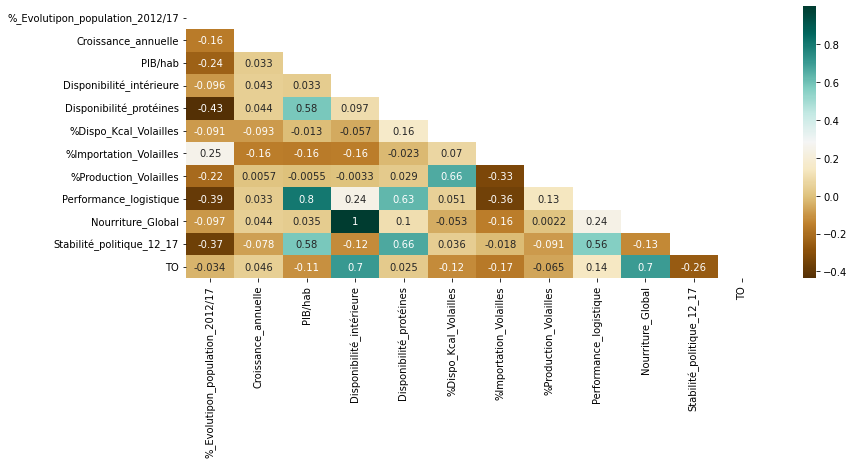

In [110]:
# Calculate pairwise-correlation
matrix = df_final.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

# Traitement des valeurs nulles

In [111]:
df_final.isna().sum()

Pays                                0
%_Evolutipon_population_2012/17     0
Croissance_annuelle                 1
PIB/hab                             1
Disponibilité_intérieure            0
Disponibilité_protéines             0
%Dispo_Kcal_Volailles               0
%Importation_Volailles              2
%Production_Volailles               4
Performance_logistique             24
Nourriture_Global                   0
Stabilité_politique_12_17          38
TO                                  1
dtype: int64

In [112]:
df_final[df_final['PIB/hab'].isnull()]

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
33,"Chine, Taiwan Province de",1.40,NaN,NaN,"2,775.00",26.67,29.93,15.06,28.34,NaN,"2,140.00",NaN,NaN


In [113]:
df_final.dtypes

Pays                                object
%_Evolutipon_population_2012/17    float64
Croissance_annuelle                float64
PIB/hab                            float64
Disponibilité_intérieure           float64
Disponibilité_protéines            float64
%Dispo_Kcal_Volailles              float64
%Importation_Volailles             float64
%Production_Volailles              float64
Performance_logistique             float64
Nourriture_Global                  float64
Stabilité_politique_12_17          float64
TO                                 float64
dtype: object

In [114]:
df_final.isna().sum()

Pays                                0
%_Evolutipon_population_2012/17     0
Croissance_annuelle                 1
PIB/hab                             1
Disponibilité_intérieure            0
Disponibilité_protéines             0
%Dispo_Kcal_Volailles               0
%Importation_Volailles              2
%Production_Volailles               4
Performance_logistique             24
Nourriture_Global                   0
Stabilité_politique_12_17          38
TO                                  1
dtype: int64

In [115]:
# Extraction index valeur nulle: Performance_logistique 
# Imputation par ....

ISNA_Performance_logistique = df_final[df_final['Performance_logistique'].isnull()].index.to_list()
ISNA_Performance_logistique

[6,
 15,
 17,
 26,
 31,
 32,
 33,
 44,
 48,
 56,
 61,
 79,
 80,
 108,
 120,
 131,
 133,
 134,
 135,
 136,
 140,
 145,
 150,
 160]

In [116]:
# Extraction index valeur nulle: Stabilité_politique_12_17     
# Extraction de mes valeurs nulles (24)
# Imputation par ....

ISNA_Stabilité_politique_12_17 = df_final[df_final['Stabilité_politique_12_17'].isnull()].index.to_list()
ISNA_Stabilité_politique_12_17

[7,
 13,
 18,
 24,
 26,
 31,
 32,
 33,
 34,
 37,
 41,
 48,
 54,
 61,
 68,
 69,
 79,
 88,
 106,
 108,
 120,
 124,
 127,
 128,
 131,
 132,
 133,
 134,
 135,
 140,
 145,
 150,
 161,
 162,
 163,
 166,
 168,
 169]

In [117]:
df_final.shape

(172, 13)

In [118]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [119]:
# Isolation des données d'expression
XX = df_final.select_dtypes('number')
print("XX", XX.shape)

XX (172, 12)


In [120]:
imp_mean = IterativeImputer(random_state=5,sample_posterior=True,initial_strategy='median')

In [121]:
imp_mean.fit(XX)


IterativeImputer(initial_strategy='median', random_state=5,
                 sample_posterior=True)

In [122]:
XX = imp_mean.transform(XX)

In [123]:
XX = pd.DataFrame(XX)

In [124]:
XX.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [125]:
XX

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...
167,3.78,6.56,"40,644.80",716.00,23.28,62.29,63.30,28.92,3.76,664.00,0.74,1.02
168,8.47,2.53,"6,213.50",652.00,11.13,60.58,0.00,28.55,2.75,620.00,0.12,5.51
169,3.52,3.59,"60,116.57","32,403.00",31.03,58.56,3.38,60.60,3.90,"31,773.00",-0.52,9.07
170,14.75,3.63,721.75,252.00,0.93,0.00,25.00,5.60,2.39,248.00,-1.52,0.35


In [126]:
df_final.drop(columns="Pays").columns

Index(['%_Evolutipon_population_2012/17', 'Croissance_annuelle', 'PIB/hab',
       'Disponibilité_intérieure', 'Disponibilité_protéines',
       '%Dispo_Kcal_Volailles', '%Importation_Volailles',
       '%Production_Volailles', 'Performance_logistique', 'Nourriture_Global',
       'Stabilité_politique_12_17', 'TO'],
      dtype='object')

In [127]:
# Récupération du nom des colonnes

df_Final = pd.DataFrame(imp_mean.transform(XX), columns = df_final.drop(columns="Pays").columns)

C:\Users\melle\anaconda3\envs\P9\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IterativeImputer was fitted with feature names
  warnings.warn(


In [128]:
df_Final.head(3)

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76


In [129]:
df_Final.isna().sum()

%_Evolutipon_population_2012/17    0
Croissance_annuelle                0
PIB/hab                            0
Disponibilité_intérieure           0
Disponibilité_protéines            0
%Dispo_Kcal_Volailles              0
%Importation_Volailles             0
%Production_Volailles              0
Performance_logistique             0
Nourriture_Global                  0
Stabilité_politique_12_17          0
TO                                 0
dtype: int64

In [130]:
df_final.columns

Index(['Pays', '%_Evolutipon_population_2012/17', 'Croissance_annuelle',
       'PIB/hab', 'Disponibilité_intérieure', 'Disponibilité_protéines',
       '%Dispo_Kcal_Volailles', '%Importation_Volailles',
       '%Production_Volailles', 'Performance_logistique', 'Nourriture_Global',
       'Stabilité_politique_12_17', 'TO'],
      dtype='object')

In [131]:
df_final.loc[df_final.index.isin(ISNA_Performance_logistique),["Performance_logistique"]]

,Performance_logistique
6,NaN
15,NaN
17,NaN
26,NaN
31,NaN
32,NaN
33,NaN
44,NaN
48,NaN
56,NaN


In [132]:
df_Final.head()

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63


In [133]:
df_Final.loc[df_Final.index.isin(ISNA_Performance_logistique),["Performance_logistique"]]

,Performance_logistique
6,2.69
15,3.20
17,2.74
26,2.57
31,3.06
32,4.47
33,2.45
44,2.10
48,2.54
56,2.75


In [134]:
df_final.loc[df_final.index.isin(ISNA_Stabilité_politique_12_17),["Stabilité_politique_12_17"]]

,Stabilité_politique_12_17
7,NaN
13,NaN
18,NaN
24,NaN
26,NaN
31,NaN
32,NaN
33,NaN
34,NaN
37,NaN


In [135]:
df_Final.loc[df_Final.index.isin(ISNA_Stabilité_politique_12_17),["Stabilité_politique_12_17"]]

,Stabilité_politique_12_17
7,1.23
13,0.47
18,-1.27
24,-0.52
26,-0.18
31,2.65
32,1.65
33,0.96
34,-8.50
37,0.44


In [136]:
df_Final.iloc[33]

%_Evolutipon_population_2012/17       1.40
Croissance_annuelle                   8.73
PIB/hab                           1,507.81
Disponibilité_intérieure          2,775.00
Disponibilité_protéines              26.67
%Dispo_Kcal_Volailles                29.93
%Importation_Volailles               15.06
%Production_Volailles                28.34
Performance_logistique                2.45
Nourriture_Global                 2,140.00
Stabilité_politique_12_17             0.96
TO                                   -4.87
Name: 33, dtype: float64

In [ ]:
df_Final.iloc[33]['PIB/hab'] = [50, 500.00]

In [137]:
df_Final.sort_values(by="PIB/hab", ascending=False)

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
87,11.50,3.49,"108,431.93",44.00,24.23,16.43,29.73,0.00,3.86,44.00,1.37,0.02
144,5.59,0.37,"83,313.01",504.00,18.39,14.21,29.31,26.53,3.92,499.00,1.35,0.11
32,10.38,10.07,"81,516.66",78.00,42.14,22.19,30.26,27.27,4.47,80.00,1.65,0.05
107,5.64,7.09,"75,220.81","1,331.00",21.44,18.08,0.18,4.19,3.80,346.00,1.22,2.23
71,2.68,17.99,"73,231.73",42.00,43.32,17.93,20.00,1.25,3.31,41.00,1.30,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...
0,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
139,11.56,-5.25,499.38,196.00,8.16,16.39,70.00,9.39,2.02,195.00,-0.14,2.50
101,15.23,7.57,461.41,580.00,5.91,16.46,32.00,17.93,2.37,558.00,-0.45,9.21
126,3.60,12.11,450.90,112.00,8.59,9.20,40.00,6.93,2.26,109.00,-2.07,1.11


ERROR! Session/line number was not unique in database. History logging moved to new session 679


In [138]:
df_Final.iloc[33]['Croissance_annuelle'] = df_Final.iloc[33]['Croissance_annuelle']==[2.63]

In [139]:
df_Final.iloc[33]

%_Evolutipon_population_2012/17       1.40
Croissance_annuelle                   8.73
PIB/hab                           1,507.81
Disponibilité_intérieure          2,775.00
Disponibilité_protéines              26.67
%Dispo_Kcal_Volailles                29.93
%Importation_Volailles               15.06
%Production_Volailles                28.34
Performance_logistique                2.45
Nourriture_Global                 2,140.00
Stabilité_politique_12_17             0.96
TO                                   -4.87
Name: 33, dtype: float64

In [140]:
df_final['PIB/hab'] = df_final['PIB/hab'].replace([0.00,50,500.00])


In [141]:
df_final.describe()

,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
count,172.00,171.00,171.00,172.00,172.00,172.00,170.00,168.00,148.00,172.00,134.00,171.00
mean,7.02,6.15,"13,987.69","2,262.75",17.12,34.07,32.51,31.56,2.84,"2,077.56",-0.04,5.02
std,6.56,7.12,"19,335.88","10,649.54",9.95,19.83,29.06,24.33,0.55,"9,584.05",0.87,11.85
min,-7.03,-29.29,359.23,6.00,0.93,0.00,0.00,0.00,1.71,5.00,-2.57,0.01
25%,2.33,3.56,"1,965.01",109.25,9.29,18.28,8.25,11.32,2.45,104.00,-0.66,0.55
50%,6.01,6.16,"5,790.91",364.00,15.88,30.31,24.77,26.48,2.67,344.00,0.05,1.52
75%,11.52,9.05,"16,479.05","1,066.00",23.94,49.48,57.78,48.84,3.12,970.25,0.68,4.86
max,33.39,32.91,"108,431.93","133,799.00",52.71,78.79,100.00,93.88,4.13,"119,486.00",1.49,102.01


In [142]:
XX.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,7.02,6.17,"13,915.14","2,262.75",17.12,34.07,32.80,31.11,2.82,"2,077.56",-0.03,4.96
std,6.56,7.10,"19,302.73","10,649.54",9.95,19.83,29.02,24.25,0.54,"9,584.05",1.11,11.84
min,-7.03,-29.29,359.23,6.00,0.93,0.00,0.00,0.00,1.71,5.00,-8.50,-4.87
25%,2.33,3.58,"1,948.86",109.25,9.29,18.28,8.51,11.09,2.45,104.00,-0.56,0.54
50%,6.01,6.17,"5,752.49",364.00,15.88,30.31,24.94,26.04,2.66,344.00,0.08,1.51
75%,11.52,9.05,"16,326.35","1,066.00",23.94,49.48,58.00,48.14,3.08,970.25,0.73,4.82
max,33.39,32.91,"108,431.93","133,799.00",52.71,78.79,100.00,93.88,4.47,"119,486.00",2.88,102.01


In [143]:
Pays = pd.DataFrame(df_final.Pays)

# df

In [144]:
df = Pays.merge(df_Final, left_index=True, right_index=True)
df

,Pays,%_Evolutipon_population_2012/17,Croissance_annuelle,PIB/hab,Disponibilité_intérieure,Disponibilité_protéines,%Dispo_Kcal_Volailles,%Importation_Volailles,%Production_Volailles,Performance_logistique,Nourriture_Global,Stabilité_politique_12_17,TO
0,Afghanistan,16.48,0.65,513.09,238.00,2.37,15.62,100.00,13.40,1.99,226.00,-2.57,2.83
1,Afrique du Sud,7.91,16.11,"6,121.88","2,765.00",17.57,67.14,71.19,65.53,3.54,"2,650.00",-0.14,10.01
2,Albanie,-1.03,9.85,"4,514.20",104.00,13.10,41.46,62.30,23.64,2.48,104.00,0.25,0.76
3,Algérie,10.71,4.14,"4,109.70",717.00,5.59,32.84,3.51,41.54,2.45,690.00,-1.14,0.71
4,Allemagne,2.08,5.61,"44,552.06","6,801.00",25.50,21.39,23.75,20.60,4.13,"6,656.00",0.77,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3.78,6.56,"40,644.80",716.00,23.28,62.29,63.30,28.92,3.76,664.00,0.74,1.02
168,Équateur,8.47,2.53,"6,213.50",652.00,11.13,60.58,0.00,28.55,2.75,620.00,0.12,5.51
169,États-Unis d'Amérique,3.52,3.59,"60,116.57","32,403.00",31.03,58.56,3.38,60.60,3.90,"31,773.00",-0.52,9.07
170,Éthiopie,14.75,3.63,721.75,252.00,0.93,0.00,25.00,5.60,2.39,248.00,-1.52,0.35


In [145]:
df.shape

(172, 13)

In [146]:
df.isna().sum()

Pays                               0
%_Evolutipon_population_2012/17    0
Croissance_annuelle                0
PIB/hab                            0
Disponibilité_intérieure           0
Disponibilité_protéines            0
%Dispo_Kcal_Volailles              0
%Importation_Volailles             0
%Production_Volailles              0
Performance_logistique             0
Nourriture_Global                  0
Stabilité_politique_12_17          0
TO                                 0
dtype: int64

In [147]:
df.to_csv(r'C:\Users\melle\FORMATION\P9_MENDY_Angèle\df.csv')  